# Pandas Data Analysis Tutorial 
This tutorial will include basic data loading with pandas and the practical applications with data analysis in python. The first 2 topics will be brief and easy, while the tutorial will be focused on topic Applications in data analysis.
All data will be taken from Quandl in csv files. Tutorial inspired by Jonathan Rocher's Pandas Tutorial SciPy Conference 2015.

1. Loading Data
    - Pd.csv_read and its parameters 
2. Built-in Commands for Modifying Data
    - Selecting data 
3. Pandas DataStructures
    - One-Dimension Series
    - Two-Dimension DataFrames
4. Applications in Data Analysis
    - Capital Asset Price Model (CAPM)
        - Visualization: Timeseries 
        - Rolling statistics 
        - Computation/statistic tools

### Initial setup

In [37]:
import pandas as pd

import datetime 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pandas import set_option
set_option("display.max_rows", 16)

## 1. Loading Data
- There are many ways to load data using pandas and these are the file types that pandas take in. 
    - read_csv
    - read_excel
    - read_json
    - read_html
    - and many more
    - for more information read: [Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/io.html)
- we will only be talking about pd.read_csv since or examples will be provided in this format

### Loading csv data files

First of all what is a csv file? 

In short a CSV is a comma separated values file, which allows data to be saved in a table structured format. 

Read more: [Bigcommerce](https://support.bigcommerce.com/articles/Public/What-is-a-CSV-file-and-how-do-I-save-my-spreadsheet-as-one#what-csv)

### Parameters of pd.read_csv
- This command will show what parameters pd.read_csv takes and some explanation `pd.read_csv?`
- `sep`
- `engine`
- `index_col`
- `names`
- `parse_dates`
- `pd.read_csv?` will provide a better description of the parameters
- For more read: [Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [38]:
#simple description of the command 
pd.read_csv?

### More on Parameters
The parameters of `pd.read_csv` can modify the data to help you with a better visulization of your data.

`parse_dates = True`: Will be used to modify the dates when the data is formated well. Or you can write functions(converters) to modify the values before getting parsed. Or to provide your own date parser, which is much more difficult.

`engine = 'c'`: Will help pd.read_csv run much faster since it runs down to c level.

`index_col`: Is used to decide which column you want to use as the index

`sep`: Decides what variable is set to determine the seperation of data.

**Example** `sep = ','`: for seperating commas, `sep = '\s+'`: for seperating white spaces

`name`: Will allow you to name your columns

**Example** `name = ['Adj_Close','Adj_Open']`: Will name your first two columns to the strings you have typed

Checking pd.read_csv will give you a prief description of what each paramter does. The parameters are great to use to modify data to a specific format you would need. 

Note: In our case our data taken from Quandl is neat and tidy so not much has to be modified. 


In [39]:
JPM = pd.read_csv('https://www.quandl.com/api/v3/datasets/EOD/JPM.csv?auth_token=yugbnR9nu6UzyUTJtZaK', parse_dates = True,
                  engine ='c', sep = ',')
#Will only display up to 3 rows for better presentation of the tutorial
#Note: JPM will display the entire set of Data
JPM


,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2016-04-15,62.88,62.900,61.450,61.87,19290257,0,1,62.880000,62.900000,61.450000,61.870000,19290257.0
1,2016-04-14,61.69,62.905,61.605,62.59,24246643,0,1,61.690000,62.905000,61.605000,62.590000,24246643.0
2,2016-04-13,60.48,62.160,60.380,61.79,37514234,0,1,60.480000,62.160000,60.380000,61.790000,37514234.0
3,2016-04-12,58.34,59.390,58.200,59.28,17755251,0,1,58.340000,59.390000,58.200000,59.280000,17755251.0
4,2016-04-11,57.91,58.880,57.910,58.20,17619280,0,1,57.910000,58.880000,57.910000,58.200000,17619280.0
5,2016-04-08,57.71,58.580,57.690,57.74,13547183,0,1,57.710000,58.580000,57.690000,57.740000,13547183.0
6,2016-04-07,58.26,58.430,57.065,57.32,19225724,0,1,58.260000,58.430000,57.065000,57.320000,19225724.0
7,2016-04-06,58.18,58.880,57.950,58.81,12163378,0,1,58.180000,58.880000,57.950000,58.810000,12163378.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8134,1984-01-11,47.88,49.000,47.380,48.87,88400,0,1,2.744426,2.808623,2.715766,2.801171,397800.0


`index_col = 0` will make the first colemn the index colemn

In [40]:
JPM = pd.read_csv('https://www.quandl.com/api/v3/datasets/EOD/JPM.csv?auth_token=yugbnR9nu6UzyUTJtZaK', parse_dates = True,
                  engine ='c', index_col = 0, sep = ',')
JPM[:3]

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2016-04-15,62.88,62.900,61.450,61.87,19290257,0,1,62.88,62.900,61.450,61.87,19290257
2016-04-14,61.69,62.905,61.605,62.59,24246643,0,1,61.69,62.905,61.605,62.59,24246643
2016-04-13,60.48,62.160,60.380,61.79,37514234,0,1,60.48,62.160,60.380,61.79,37514234


We will load the S&P500 Data for later use. 

In [41]:
SP500 = pd.read_csv('https://www.quandl.com/api/v3/datasets/YAHOO/INDEX_GSPC.csv?auth_token=Gd9-HysMPeQX8XCsthtA',
                    parse_dates = True, engine = 'c', index_col = 0)
SP500[:3]

,Open,High,Low,Close,Volume,Adjusted Close
Date,,,,,,
2016-04-15,2083.100098,2083.219971,2076.310059,2080.729980,3701450000,2080.729980
2016-04-14,2082.889893,2087.840088,2078.129883,2082.780029,3765870000,2082.780029
2016-04-13,2065.919922,2083.179932,2065.919922,2082.419922,4191830000,2082.419922


## 2. Built-in Commands for Modifying Data
- A basic introduction to selecting data from a DataFrame
- These basic commands are the basics to accessing data, which will allow you to later clean and modify the data


In [42]:
#selects the column with the specific name you put in
#[:1] for saving space
JPM['Adj_Close'][:1]

Date
2016-04-15    61.87
Name: Adj_Close, dtype: float64

In [43]:
#The amount of data according to the amount of rows
JPM[:2]

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2016-04-15,62.88,62.900,61.450,61.87,19290257,0,1,62.88,62.900,61.450,61.87,19290257
2016-04-14,61.69,62.905,61.605,62.59,24246643,0,1,61.69,62.905,61.605,62.59,24246643


In [44]:
#Selecting multiple columns
JPM[['Adj_Close','Adj_Close']][:2]

,Adj_Close,Adj_Close
Date,,
2016-04-15,61.87,61.87
2016-04-14,62.59,62.59


In [45]:
#Counts the number of times the values have occured
#Not as useful in our case of stock prices
#This command could be plotted with JPM['Adj_Close'].value_counts().plot(kind='bar') usually plotted with bar graphs
JPM['Adj_Close'].value_counts()

6.508332     11
3.263411     10
3.485286     10
4.862759     10
3.827343      8
3.864322      8
3.882812      7
3.836588      7
             ..
26.965043     1
31.154941     1
28.218372     1
33.263245     1
14.828643     1
52.085630     1
34.426002     1
14.800908     1
Name: Adj_Close, dtype: int64

## 3. Pandas DataStructures
A brief understanding of Data structures in Pandas. They are a bit different from NumPy arrays and lists and it will be easier to work on them with some explanation of it.
- One-Dimension Series
- Two-Dimension DataFrame

### One-Dimensional Series
- Series is a One-dimensional array that acts like a Numpy ndarray
- One-dimensional ndarray with axis labels (including time series)
- The commands below can help with understanding Series



In [46]:
#simple example of creating a series
s = pd.Series([0,0,0])
s

0    0
1    0
2    0
dtype: int64

In [47]:
#calling this command will show that a Series is acts  like a NumPy ndarray
s.values

array([0, 0, 0])

In [48]:
#We can now extract a Series from our DataFrame 
JPM_Series = JPM['Adj_Close']
#Again we will only take the first 2 rows for a clear display in the tutorial 
JPM_Series[:2]

Date
2016-04-15    61.87
2016-04-14    62.59
Name: Adj_Close, dtype: float64

In [49]:
#check the data type of the column, which is a Series
type(JPM_Series)

pandas.core.series.Series

In [50]:
#We can now find the number of rows and type of the Series by calling these two commands
print(JPM_Series.shape)
print(JPM_Series.dtypes)

(8142,)
float64


### Two Dimensional DataFrames
- Two-dimensional size-mutable tabular data structure.

In [51]:
#We can check the type of data by executing this command
#Type of data: DataFrame
type(JPM)

pandas.core.frame.DataFrame

In [52]:
# .shape will tell you the number of columns and number of rows
print(JPM.shape)

(8142, 12)


In [53]:
# What is special about a 2D DataFrame each column has its own dtype
print(JPM.dtypes)

Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Dividend      float64
Split         float64
Adj_Open      float64
Adj_High      float64
Adj_Low       float64
Adj_Close     float64
Adj_Volume    float64
dtype: object


In [54]:
#displays all the column names
JPM.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividend', 'Split',
       'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close', 'Adj_Volume'],
      dtype='object')

In [55]:
#displays all the index names
JPM.index

DatetimeIndex(['2016-04-15', '2016-04-14', '2016-04-13', '2016-04-12',
               '2016-04-11', '2016-04-08', '2016-04-07', '2016-04-06',
               '2016-04-05', '2016-04-04',
               ...
               '1984-01-13', '1984-01-12', '1984-01-11', '1984-01-10',
               '1984-01-09', '1984-01-06', '1984-01-05', '1984-01-04',
               '1984-01-03', '1983-12-30'],
              dtype='datetime64[ns]', name='Date', length=8142, freq=None)

In [56]:
#gives you a good description of your DataFrame 
JPM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8142 entries, 2016-04-15 to 1983-12-30
Data columns (total 12 columns):
Open          8142 non-null float64
High          8142 non-null float64
Low           8142 non-null float64
Close         8142 non-null float64
Volume        8142 non-null float64
Dividend      8142 non-null float64
Split         8142 non-null float64
Adj_Open      8142 non-null float64
Adj_High      8142 non-null float64
Adj_Low       8142 non-null float64
Adj_Close     8142 non-null float64
Adj_Volume    8142 non-null float64
dtypes: float64(12)
memory usage: 826.9 KB


## 4. Application in Data Analysis

### Capital Asset Pricing Model (CAPM)

We will be using this Model to teach some of the basic tools of Pandas in Data Analysis. We will only go over the specific parts that may apply to this certain model for each section. 

- Visualization
    - Timeseries: The visualization of stock prices 
    - different types of plots 
-  Computation/Statistic Tools
    - statistical functino 
    - Moving(rolling) statisic/movements

#### Visualization: Time Series 
The CAPM model requires an understanding of the graphs of stock prices. Mostly to see outliers and different trends of the the graph.

Pandas has simplified the plt.plot function using `matplotlib` to `Series.plot()` taking different parameters that determines specific graph you want. 

- Timeseries: The visualization of stock prices 
- different types of plots 

This plot below is the Time vs. Adjusted Close Stock price graph.

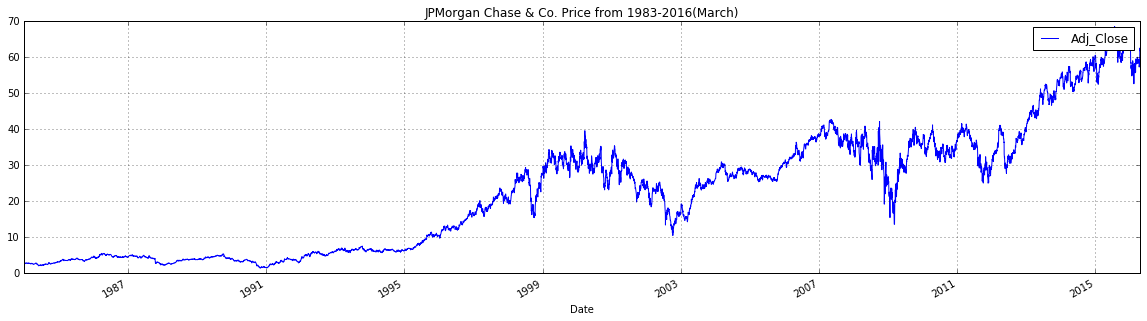

In [57]:
#The Adjusted Closing price of the stock
JPM.Adj_Close.plot(figsize = (20,5), label = 'Adj_Close')
plt.legend()
plt.title('JPMorgan Chase & Co. Price from 1983-2016(March)')
plt.grid()
plt.show();

The volume graph of JPM below, the syntax for Pandas is very simple JPM.Volume.plot() The Volue part of the syntax is basically the name of that Column. 

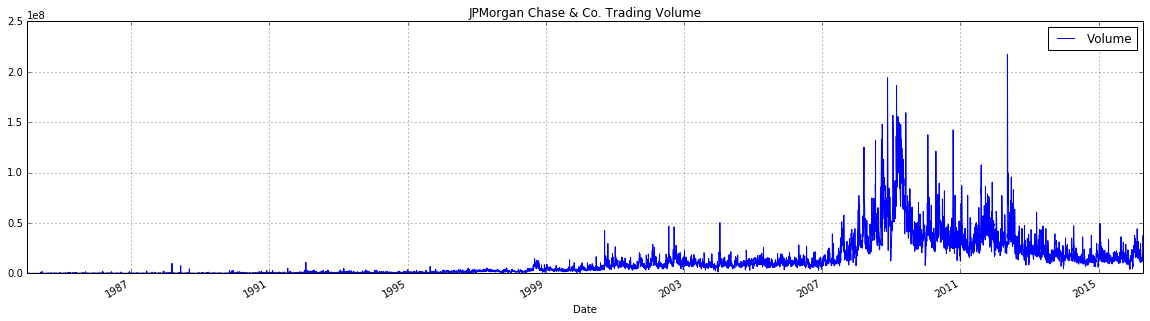

In [58]:
JPM.Volume.plot(figsize = (20,5), label = 'Volume')
plt.legend()
plt.title('JPMorgan Chase & Co. Trading Volume')
plt.grid()
plt.show();

#### Moving Average

In statistics, a moving average (rolling average) is a calculation to analyze data points by creating subset averages of the original dataset.

source: [Wikipedia](https://en.wikipedia.org/wiki/Moving_average)

In Pandas we can use the pd.rolling_mean to get the moving average

In [59]:
moving_average20 = JPM['20_JPM_Adj_Close'] = pd.stats.moments.rolling_mean(JPM['Adj_Close'], 20)
#We can look at the end of the data by calling .tail() and start of the data with .head()
JPM['20_JPM_Adj_Close'].tail()

Date
1984-01-06    2.827519
1984-01-05    2.821510
1984-01-04    2.810416
1984-01-03    2.791464
1983-12-30    2.774824
Name: 20_JPM_Adj_Close, dtype: float64

In [60]:
JPM['20_JPM_Adj_Close']

Date
2016-04-15         NaN
2016-04-14         NaN
2016-04-13         NaN
2016-04-12         NaN
2016-04-11         NaN
2016-04-08         NaN
2016-04-07         NaN
2016-04-06         NaN
                ...   
1984-01-11    2.840924
1984-01-10    2.840462
1984-01-09    2.835839
1984-01-06    2.827519
1984-01-05    2.821510
1984-01-04    2.810416
1984-01-03    2.791464
1983-12-30    2.774824
Name: 20_JPM_Adj_Close, dtype: float64

#### Moving Average and Adjusted Close Graph
This graph is the moving average graph overlaying the Adjusted Close graph. The moving average is commonly used with time series data to smooth out short-term fluctuations and highlight longer-term trends or cycles.

In [61]:
Adj_close = JPM['Adj_Close']
moving_average = pd.rolling_mean(Adj_close, 25)

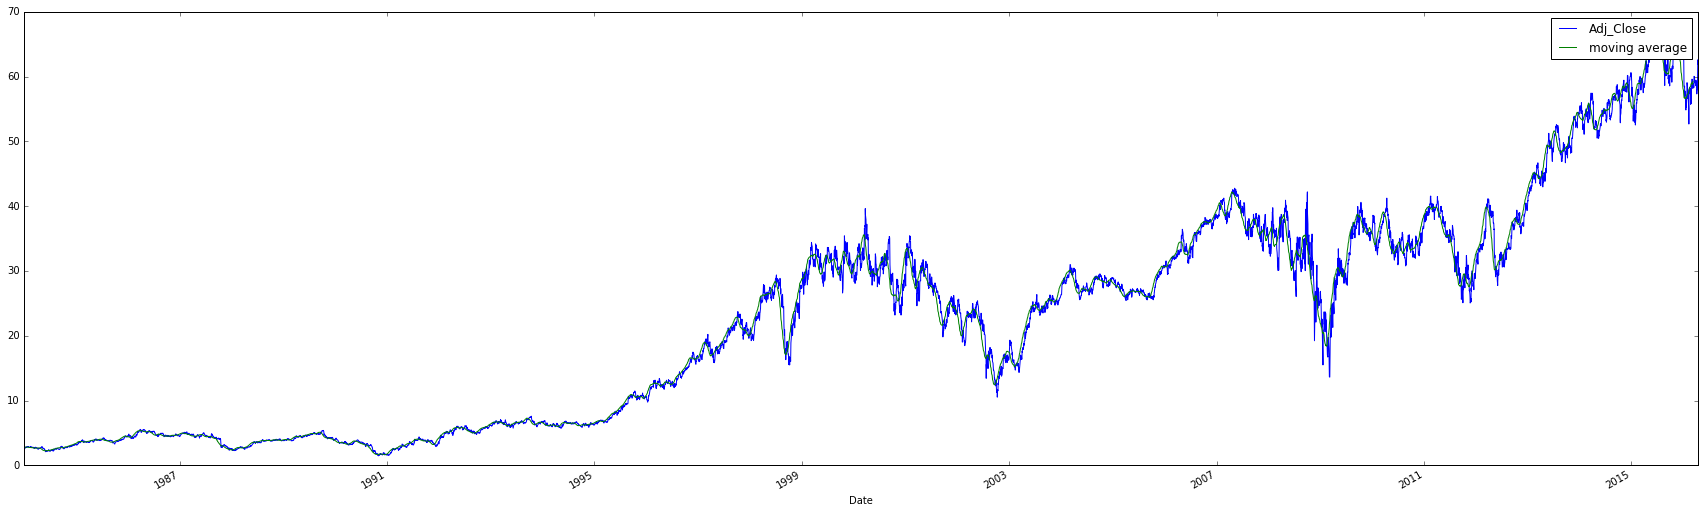

In [62]:
JPM.Adj_Close.plot(figsize = (30,9))
moving_average.plot(label='moving average', figsize = (30,9))
plt.legend()
plt.show();

#### Extra Plots
##### Kernel Density Estimation plot

In statistics, kernel density estimation (KDE) is a way to estimate the probability density function(pdf) of a random variable. 

The kernel desnity estimator is:

$\hat{f}_h{(x)} = \frac{1}{n} \sum_{i=1}^{n}{K_{h}{(x-{x_i})}} = \frac{1}{nh} \sum_{i=1}^{n}{K_{h}} (\frac{x-{x_i}}{h})$

In Pandas Pandas.Series.plot(kind = 'kde') will plot out the estimation for you. 

source:[Wikipedia](https://en.wikipedia.org/wiki/Kernel_density_estimation)

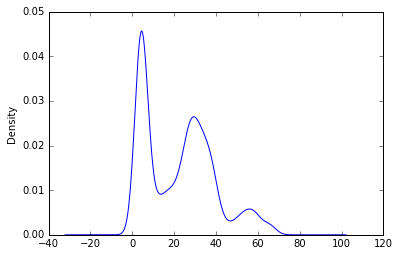

In [63]:
JPM.Adj_Close.plot(kind='kde');

### Computational/Statistics Tools
In this section we will explore some computation and statistics tools in Pandas. We will go over the statistical functions using the CAPM model. However we won't go over the moving statisitic tools in this tutorial; pandas.rolling_mean() the previously covered material will be the only moving statisics in this tutorial. Moving or rolling means that the tool takes in a certain window and operates on that certain window. 

- Statistical functions
    - percentage change 
    - covariance 
    - correlation 
    - variance
    
- Moving(rolling) Statistics/moments 
    - pandas.rolling_mean()
    - pandas.rolling_correlationg()
    - pandas.rolling_sum()
    - and many more 

Read more: http://pandas.pydata.org/pandas-docs/stable/computation.html


#### Correlation 
The correlation between the S&P 500 and The Adjusted Closing stock price of JPMorgan Chase & Co. is approximately 0.974118318, which shows a strong uphill positive linear relationship. This tells us how the stock is in relationship towards the market. 

Another good example would be the correlation between the Canadian dollar and the oil price. This can help you anaylyze how the Dollar doing. 

**Note**: There are several methods for computing correlations:

**pearson (default)**:Standard correlation coefficient

**kendall**:          Kendall Tau correlation coefficient

**spearman**:         Spearman rank correlation coefficient

In [64]:
#The pearson method
JPM['Adj_Close'].corr(SP500['Adjusted Close'])

0.97447178579420257

Now we will use the CAPM model to explore some other statistical functions

#### What is the Capital Asset Pricing Model (CAPM)

The capital asset pricing model (CAPM) is a model that describes the relationship between risk and expected return and that is used in the pricing of risky securities.

Capital Asset Pricing Model (CAPM)

$r_a = r_f + \beta_a(r_m - r_f) $

$r_f = \ \ Risk\ \ free \ \ rate$

$\beta_a = \ \ Beta\ \ of \ \ the \ \ security$

$r_m = \ \ Expected \ \ market  \ \ return$


The idea behind CAPM is that investors need to be compensated in two ways: time value of money and risk.
The time value of money = risk-free $r_f$ rate, which compensates the investors for placing money in any investment over a period of time. Then there is risk in the investment. This is calculated by taking a $\beta$ (beta) that compares the returns of the asset to the market over a period of time and to the market premium $(r_m - r_f)$.

A good investment is when expected return of a security or a portfolio equals the rate on a risk-free security plus a risk premium. Investmnet should not be taken if expected return does not exceed the required return. 

Source: [Capital Asset Pricing Model (CAPM) Definition | Investopedia](http://www.investopedia.com/terms/c/capm.asp#ixzz41bOBpUKD)


## Calcualting each variable in the CAPM model

`r_f` in this case is U.S Treasury bonds

`r_m` in this case we use the average return of the market(usually the S&P 500 (We have previously defined to be sp500))

In this case say our project is a 5-year project we then choose the rate for `r_f` to be $1.34\%$

For more rates of U.S Treasury bonds: [Bloomberg](http://www.bloomberg.com/markets/rates-bonds/government-bonds/us)

The market returns of the S&P500 from $1990-2011$ is around `r_m = ` $0.077$ 



In [65]:
#define r_f with the given value
r_f = 0.0134

### Calculating the beta

the beta is calculated from taking the percentage change of the stock and the percentage change in 

$\beta = \frac{cov(Stock \ \ vs. \ \ The \ \ market \ \ returns)}{variance \ \ of \ \ the \ \ market}$

Pandas is useful since it has the built in function:
we can use these functions becuase we have are working on pandas series and dataframes

Calculating the $\beta$ requires us to first look at the adjusted close of the stock. If there are outliers on the data then you might want to exclude that fraction of the data in your $\beta$ calculation.

In the graph below I also plotted the moving average using `pd.rolling_mean` to see a smoother curve of the adjusted close

In this case the stock of JP Morgan Chase & CO. doesn't seem to have any problem or outliers so we would use the whole adjusted close of our data in the beta calculation.

### Statistical functions we would be using in the CAPM model:

1. `Series.pct_change()` 

Series, DataFrame, and Panel all have a method pct_change to compute the percent change over a given number of periods (using fill_method to fill NA/null values before computing the percent change).


2. `Series.cov(Series)`

The Series object has a method cov to compute covariance between series (excluding NA/null values).

3. `Series.var()`

Calculates the varience of the given Series

In [66]:
def beta(stock, market):
    beta = (stock.pct_change()).cov(market.pct_change())/((market.pct_change()).var())
    return beta

In [67]:
beta(JPM['Adj_Close'], SP500['Adjusted Close'])

1.9915362055914074

In [68]:
def r_a(r_f, b, r_m):
    r_a = r_f + b*(r_m-r_f)
    return r_a


We have previoulsy found that

$r_f = 0.0134$

$r_m = 0.077$

and our $\beta$ can be obtained from the beta function


In [69]:
r_a(0.0134,beta(JPM['Adj_Close'], SP500['Adjusted Close']), 0.077)

0.14006170267561352

This approximation $r_a = 0.14022407$ is used to evaluate that certain stock in the portfolio whether its worth investing or not. May require professionals to determine the reliablity of the calculated data. 